In [1]:
import pickle

# Load the augmented images and labels from the file
with open('../../local_data/augmented_data.pickle', 'rb') as f:
    augmented_images, augmented_labels = pickle.load(f)

In [2]:
augmented_labels[:5]

[0, 1, 1, 1, 0]

In [3]:
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical

augmented_images = np.array(augmented_images, dtype=np.float32)
augmented_labels = np.array(augmented_labels, dtype=np.int32)
augmented_labels = to_categorical(augmented_labels)

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(augmented_images, augmented_labels, test_size=0.2, random_state=42)

In [4]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((1600, 512, 512, 3), (1600, 2), (400, 512, 512, 3), (400, 2))

In [5]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Conv2D, MaxPooling2D, Normalization, Flatten
from tensorflow.keras.models import Model

base_model = tf.keras.applications.MobileNetV2(input_shape=(512, 512, 3), include_top=False, weights='imagenet')

base_model.trainable = False

x = base_model.output
x = Conv2D(512, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Normalization()(x)

x = Conv2D(512, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Normalization()(x)
x = Flatten()(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [6]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint
callbacks = [ModelCheckpoint(filepath='../../models/pre_model_green_7.keras', monitor='val_loss', mode='min', save_best_only=True)]


history = model.fit(
  X_train,
  y_train, 
  epochs=5, 
  validation_data=(X_val, y_val),
  callbacks=callbacks
  )

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 213s 4s/step - accuracy: 0.6112 - loss: 0.9798 - val_accuracy: 0.9250 - val_loss: 0.2105
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 193s 4s/step - accuracy: 0.9560 - loss: 0.1167 - val_accuracy: 0.9900 - val_loss: 0.0566
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 194s 4s/step - accuracy: 0.9969 - loss: 0.0209 - val_accuracy: 0.9950 - val_loss: 0.0333
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 209s 4s/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.9975 - val_loss: 0.0291
Epoch 5/5
 1/50 ━━━━━━━━━━━━━━━━━━━━ 2:39 3s/step - accuracy: 1.0000 - loss: 0.0011

KeyboardInterrupt: 

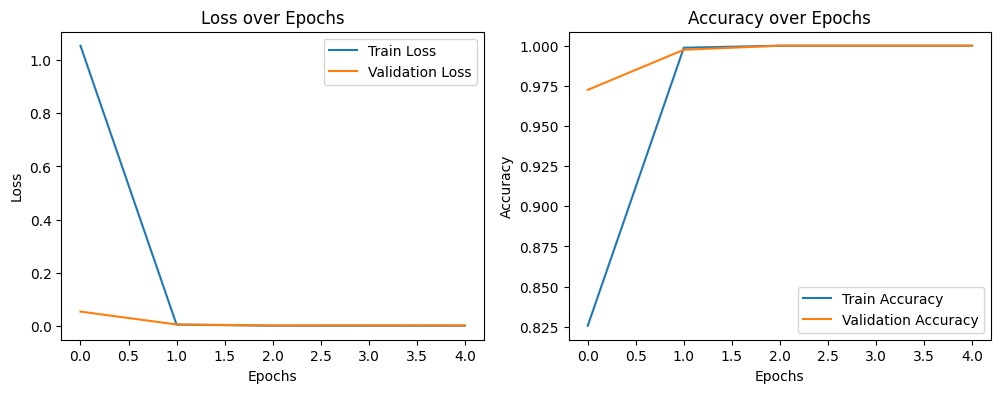

In [12]:
# Optionally, plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.show()

In [13]:
model.save('../../models/pre_model_green_7.h5')